In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import hmean
from datetime import datetime, timedelta

In [2]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
data = data[data.location == 'Germany'][['date', 'location', 'new_cases', 'new_deaths', 'new_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].copy()
data['date'] = pd.to_datetime(data.date)
data.tail()

,date,location,new_cases,new_deaths,new_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
31078,2021-05-09,Germany,0.0,55.0,282396.0,27407111.0,32.71,9.41
31079,2021-05-10,Germany,7321.0,274.0,576646.0,27802608.0,33.18,9.63
31080,2021-05-11,Germany,19696.0,267.0,1062497.0,28597089.0,34.13,9.96
31081,2021-05-12,Germany,6590.0,66.0,1353453.0,29627945.0,35.36,10.35
31082,2021-05-13,Germany,13631.0,402.0,408260.0,29891651.0,35.68,10.53


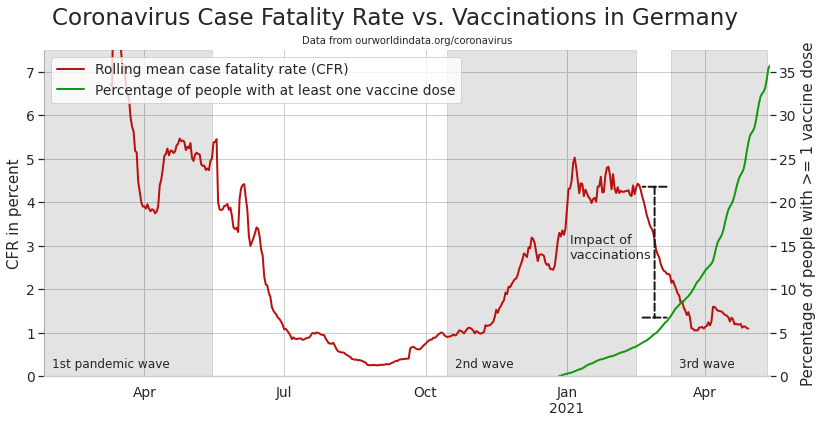

In [4]:
print('')
print('')
print('')
sns.set(font_scale=1.25)
sns.set_style("whitegrid")

cfr = data.new_deaths.rolling(3).mean().shift(-14) / data.new_cases.rolling(1).mean()
cfr = cfr.apply(lambda x: x if (x > 0 and x < 100.0) or np.isnan(x) else 0.000001)
data['CFR'] = cfr.rolling(14).apply(hmean) * 100.0

ax = data[['date', 'CFR']].set_index('date').plot(linewidth=2, figsize=(13,6), color='#bb1010')
plt.suptitle('Coronavirus Case Fatality Rate vs. Vaccinations in Germany', fontsize=23)
plt.title('Data from ourworldindata.org/coronavirus', fontsize=10)
plt.ylim([0, 7.5])
plt.ylabel('CFR in percent')
plt.xlabel('')

ax.axvspan(pd.Timestamp('2020-01-27 00:00:00'), pd.Timestamp('2020-05-15 00:00:00'), alpha=0.12, color='k')
ax.axvspan(pd.Timestamp('2020-10-15 00:00:00'), pd.Timestamp('2021-02-15 00:00:00'), alpha=0.12, color='k')
ax.axvspan(pd.Timestamp('2021-03-10 00:00:00'), pd.Timestamp('2021-05-11 00:00:00'), alpha=0.12, color='k')

handles, labels = ax.get_legend_handles_labels()

ax2 = ax.twinx()

data[['date', 'people_vaccinated_per_hundred']].set_index('date').plot(ax=ax2, linewidth=2, color='#109910', alpha=1, label='')
plt.ylim([0, 75/2])

handles2, labels2 = ax2.get_legend_handles_labels()

ax.legend(handles + handles2, ['Rolling mean case fatality rate (CFR)', 'Percentage of people with at least one vaccine dose'], loc='upper left')
ax2.get_legend().remove()
ax2.grid(False)

plt.annotate('1st pandemic wave', [pd.Timestamp('2020-02-01 00:00:00'), 1], fontsize=12)
plt.annotate('2nd wave', [pd.Timestamp('2020-10-20 00:00:00'), 1], fontsize=12)
plt.annotate('3rd wave', [pd.Timestamp('2021-03-15 00:00:00'), 1], fontsize=12)

plt.annotate('', xy=[pd.Timestamp('2021-02-27 00:00:00'), 6.5], xytext=[pd.Timestamp('2021-02-27 00:00:00'), 22], textcoords='data', fontsize=12, arrowprops=dict(arrowstyle="|-|", color='k',linestyle='--', linewidth=2))
plt.annotate('Impact of\nvaccinations', [pd.Timestamp('2021-01-03 00:00:00'), 13.5], fontsize=13)

#plt.ticklabel_format(useOffset=False, style='plain', axis='y')
sns.despine(left=True)
plt.ylabel('Percentage of people with >= 1 vaccine dose')
plt.xlabel('')

#plt.tight_layout()
plt.show()
print('')
print('')
print('')